# Trabalho Prático 1
# Aluna: Catherine Bezerra Markert
# Matrícula: 497174
# Curso: Engenharia de Computação
# Semestre da Disciplina: 2024.1

# Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, accuracy_score, roc_auc_score, mean_squared_error,r2_score
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
!pip install ucimlrepo
import ucimlrepo
from ucimlrepo import fetch_ucirepo

# Funções

In [ ]:
def plot_hist(df):
  for col in df.columns:
    if df[col].dtype != object:
        sns.histplot(df[col], color='cornflowerblue', bins=8)
        plt.ylabel('Count')
        plt.title(f'Histogram of {col}')
        plt.show()

def plot_boxp(df):
  for col in df.columns:
    if df[col].dtype != object:
        sns.boxplot(df[col], color='cornflowerblue')
        plt.ylabel('Count')
        plt.title(f'Boxplot of {col}')
        plt.show()

def plot_hist_classes(df,classe):
  for col in df.columns:
    if df[col].dtype != object:
        f, ax = plt.subplots(figsize=(7, 5))
        sns.despine(f)

        sns.histplot(
        df,
        x=col, hue=df[classe],
        multiple="stack",
        palette="mako",
        edgecolor=".3",
        linewidth=.5
        )
        plt.ylabel('Count')
        plt.title(f'Histogram of {col} by {classe}')
        plt.show()

def plot_boxp_classes(df,classe):
  for col in df.columns:
    if df[col].dtype != object:
        sns.boxplot(y=col, hue=df[classe], palette="mako", data=df)
        sns.despine(offset=5, trim=True)
        plt.ylabel('Count')
        plt.title(f'Boxplot de {col} by {classe}')
        plt.show()


Função conjunta:

In [ ]:
def univariate_analysis(df, classe):
  plot_hist(df)
  plot_hist_classes(df,classe)
  plot_boxp(df)
  plot_boxp_classes(df,classe)

def bivariate_analysis(df, classe):
  sns.pairplot(df, hue=classe, palette="mako")

def corr_plot(df):
  corr = df.corr()
  matrix = np.triu(corr)

  plt.figure(figsize=(10, 8))
  sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', mask=matrix)
  plt.show()

Pipeline para Classificação

In [ ]:
def oddNumbers(l, r):
    return list(range(l if l % 2 else l + 1, r + 1, 2))
odd_numbers = oddNumbers(1,50)

In [ ]:
preprocessor = Pipeline([
    ('scaler', StandardScaler())
])


k_params = {"n_neighbors": odd_numbers}
knn_model = GridSearchCV(KNeighborsClassifier() , k_params)
svc_model = SVC(probability=False)

knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', knn_model)
])

svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', svc_model)
])

Funções de resultado para classificação

In [ ]:
def class_report(real, pred):
    result1 = classification_report(real, pred)
    print("Classification Report:")
    print(result1)

    result2 = accuracy_score(real, pred)
    print("\nAccuracy:", result2)

Pipeline para Regressão

In [ ]:
preprocessor = Pipeline([
    ('scaler', StandardScaler())
])


lin_reg_model = LinearRegression()
grid = {
    'n_estimators': [1,2,3,4,5,6,7,8,9,10],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [42]
}
CV_rfr_model = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 10)


lin_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lin_reg_model)
])

rfr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', CV_rfr_model)
])

Funções de resultado para regressão:

In [ ]:
def RMSE(y_true, y_predictions):
  return np.sqrt(mean_squared_error(y_true, y_predictions))

In [ ]:
def reg_report(real, pred):
  print(f'RMSE: {RMSE(real, pred):.3f}')
  print(f'r2: {r2_score(real, pred):.3f}')

# Iris Dataset

## Carregando o dataset

In [ ]:
df_1 = sklearn.datasets.load_iris()

iris_df = pd.DataFrame(data=np.c_[df_1['data'], df_1['target']],
                  columns= df_1['feature_names'] + ['target']).astype({'target': int}) \
       .assign(species=lambda x: x['target'].map(dict(enumerate(df_1['target_names']))))

## Análise Exploratória

Descrição do dataset

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris_df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

As classes são balanceadas

In [ ]:
iris_ea = iris_df.drop('target', axis=1)

### Análise Univariada

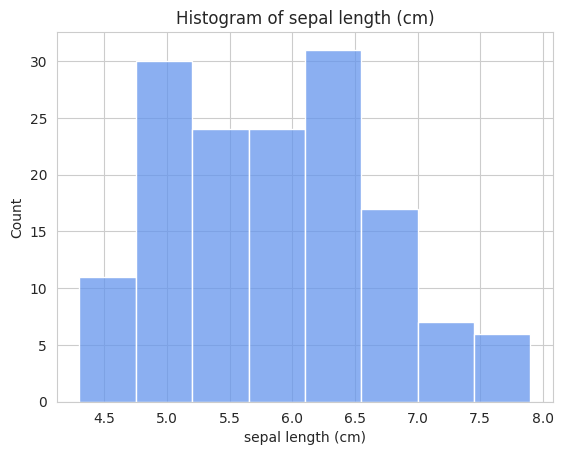

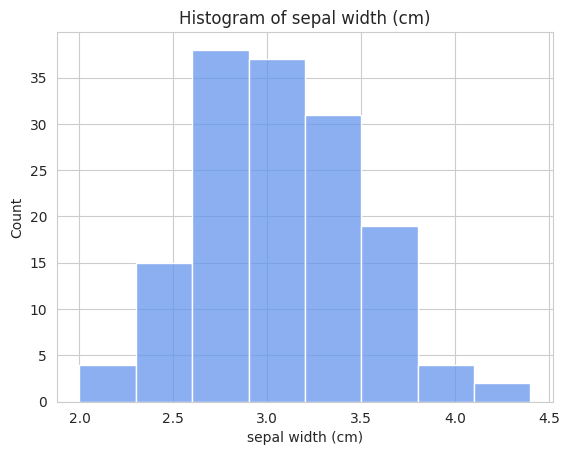

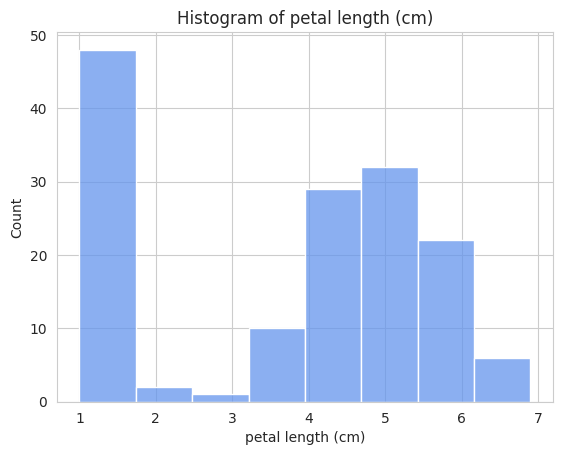

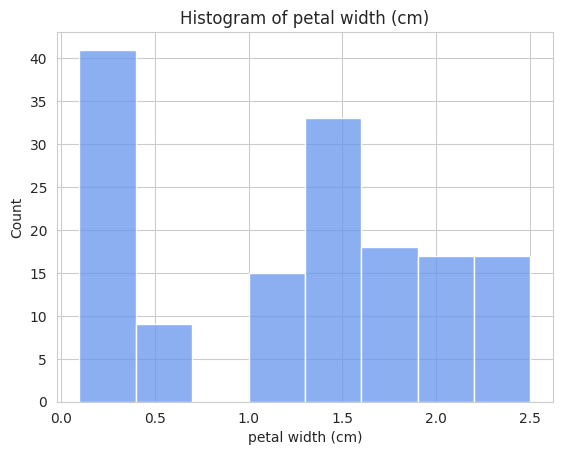

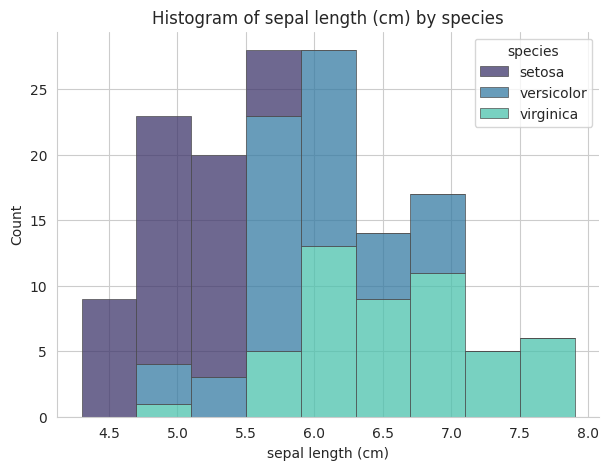

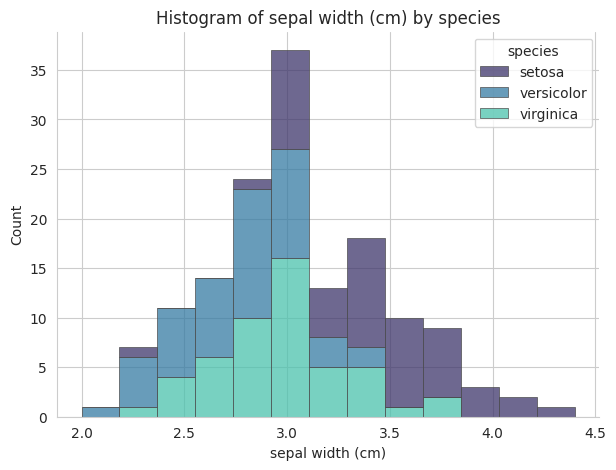

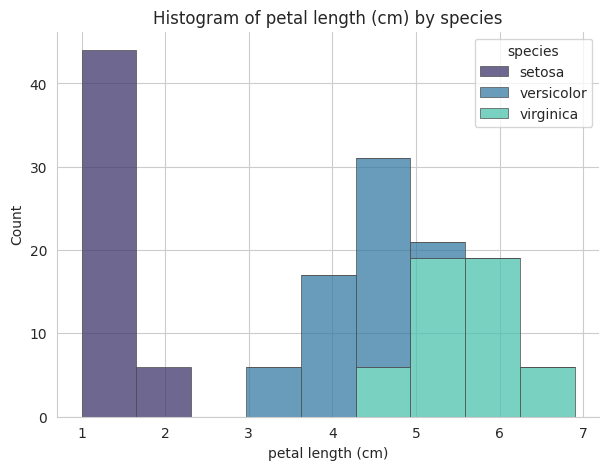

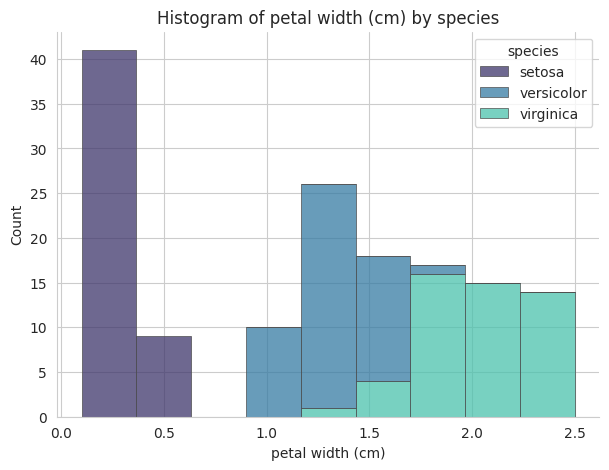

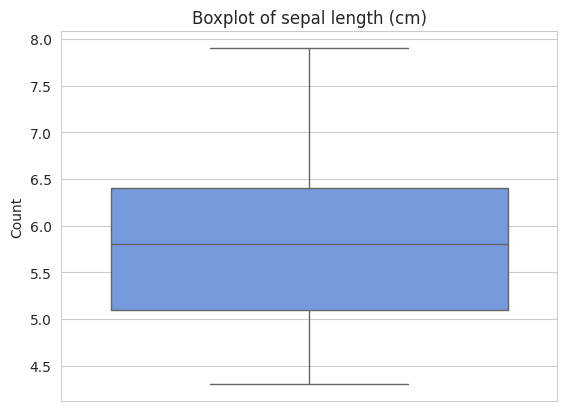

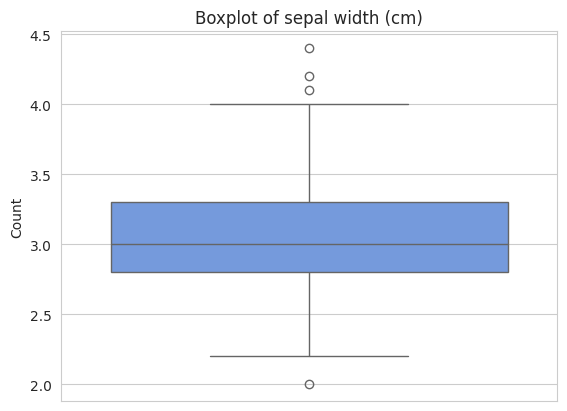

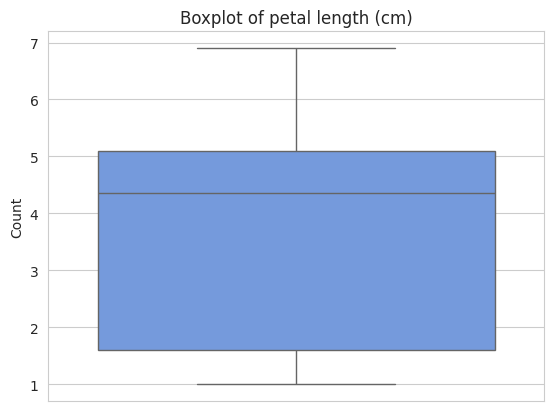

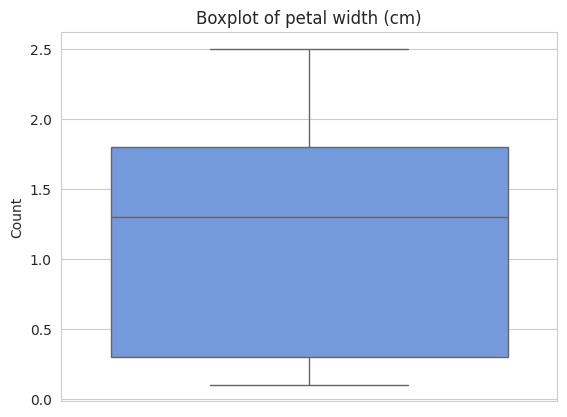

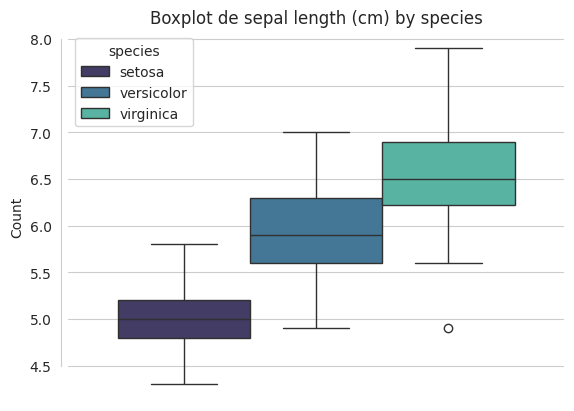

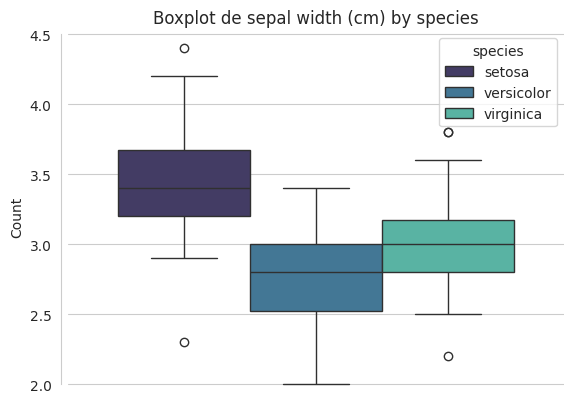

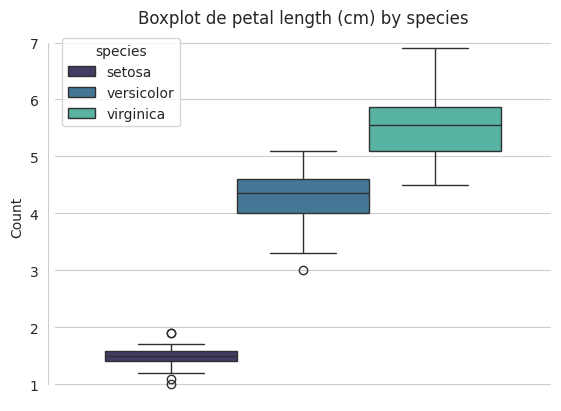

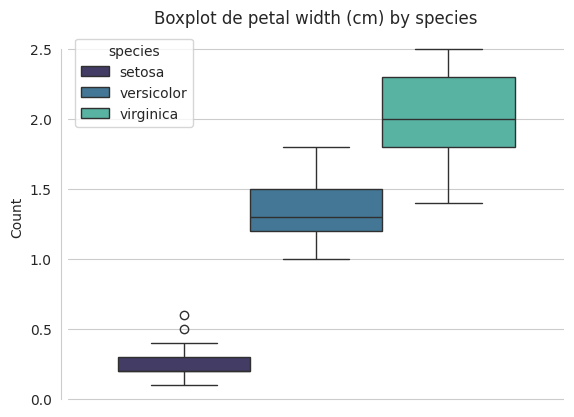

In [ ]:
univariate_analysis(iris_ea, 'species')

### Análise Bivariada

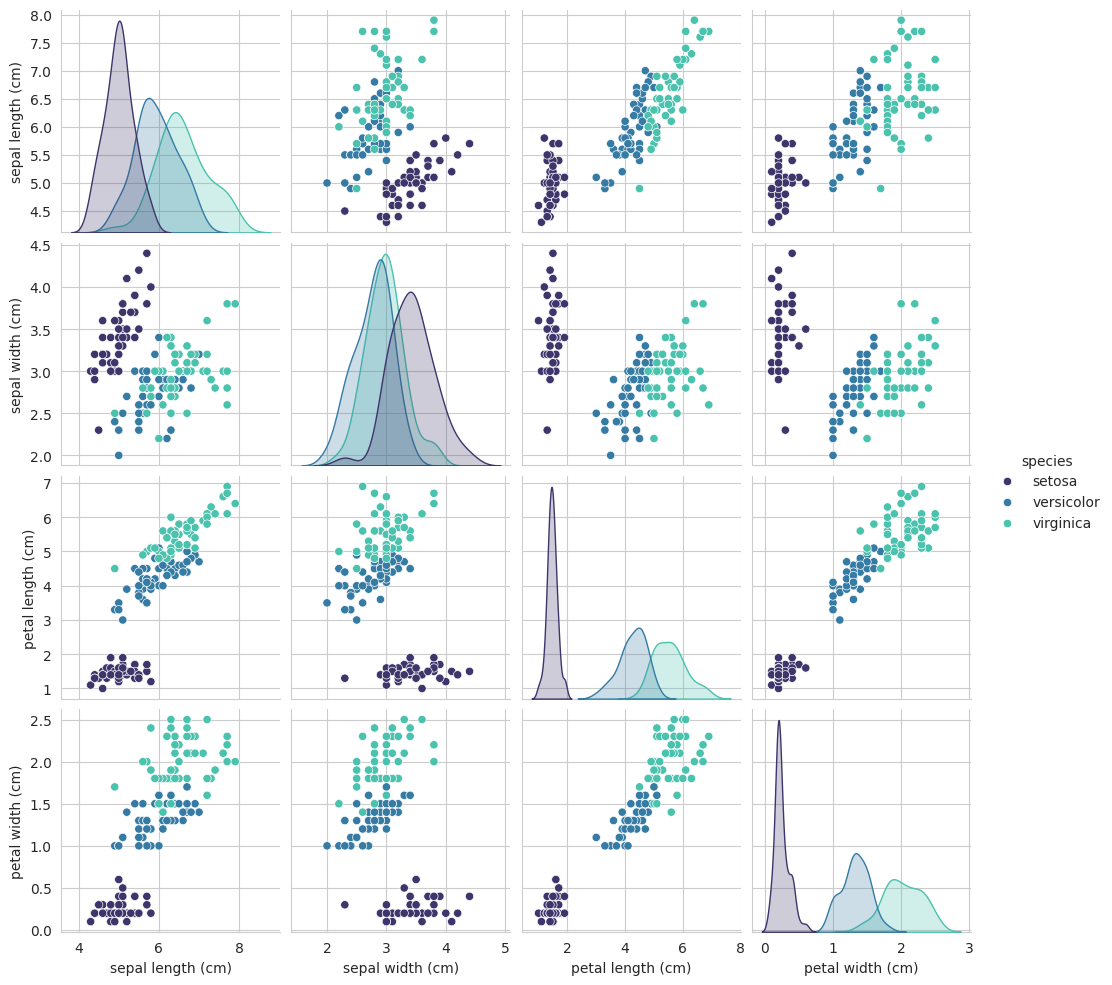

In [ ]:
bivariate_analysis(iris_ea, "species")

Dados das espécies versicolor e virginica possuem uma correlação linear na maioria das features

### Matriz de Correlação

<ipython-input-3-1c302e0b65f1>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


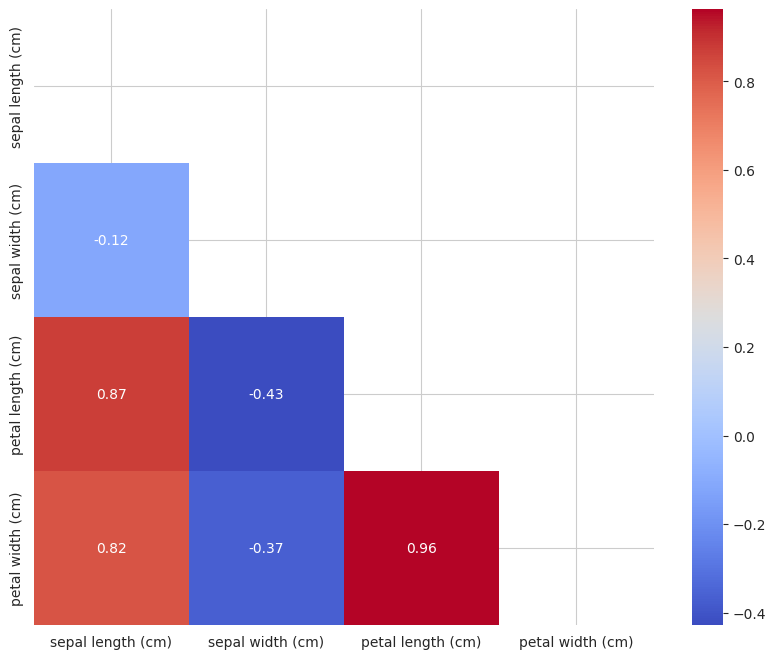

In [ ]:
corr_plot(iris_ea)

## Pré-Processamento e Classificação


In [ ]:
X = iris_df.drop(['target','species'], axis=1)
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)

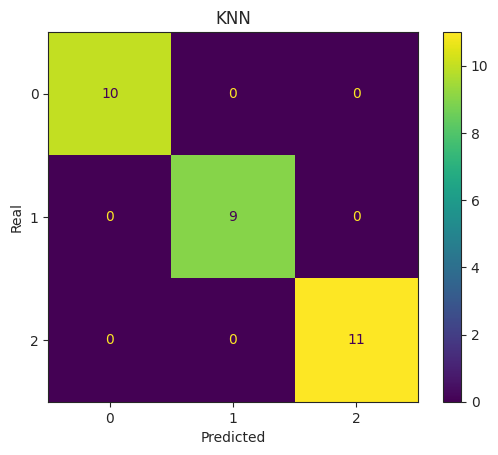

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy: 1.0


In [ ]:
knn_pipeline.fit(X_train, y_train)
knn_pred = knn_pipeline.predict(X_test)

sns.set_style('ticks')
cm = confusion_matrix(y_test, knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('KNN')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

class_report(y_test, knn_pred)

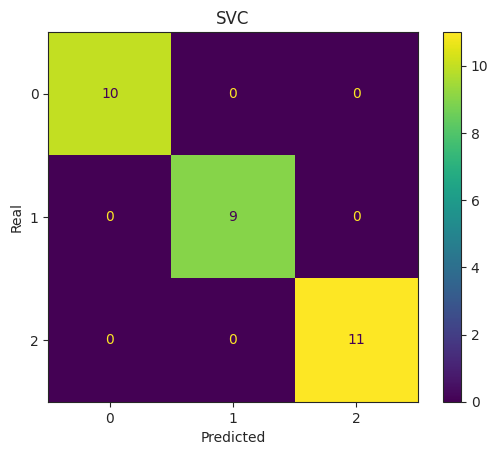

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy: 1.0


In [ ]:
svc_pipeline.fit(X_train, y_train)
svc_pred = svc_pipeline.predict(X_test)

cm = confusion_matrix(y_test, svc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('SVC')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

class_report(y_test, svc_pred)

## Insights

- Por ter poucos dados, poucas features e dados muito correlacionados, os modelos testados conseguem se adaptar bem aos dados de entrada e de saída e gerar modelos que possuem uma alta acurácia.

# Wine Quality Dataset

## Carregando o dataset

In [ ]:
wine_quality = fetch_ucirepo(id=186)

wq_df_x = wine_quality.data.features
wq_df_y = wine_quality.data.targets

In [ ]:
wq_df_x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
wq_df_y.head()

,quality
0,5
1,5
2,5
3,6
4,5


## Análise Exploratória

Descrevendo o dataset

In [ ]:
wq_df_x.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [ ]:
wq_df_x.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [ ]:
wq_df_y.describe()

,quality
count,6497.000000
mean,5.818378
std,0.873255
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


In [ ]:
wq_df_y.isna().sum()

quality    0
dtype: int64

In [ ]:
wq_df_y.value_counts()

quality
6          2836
5          2138
7          1079
4           216
8           193
3            30
9             5
dtype: int64

Classes bem desbalanceadas

### Análise Univariada

In [ ]:
wq_df_ea = pd.merge(wq_df_x, wq_df_y, left_index=True, right_index=True, how='inner')

In [ ]:
wq_df_ea.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


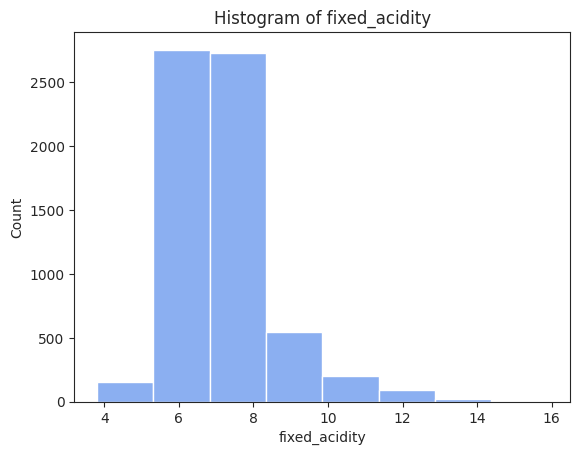

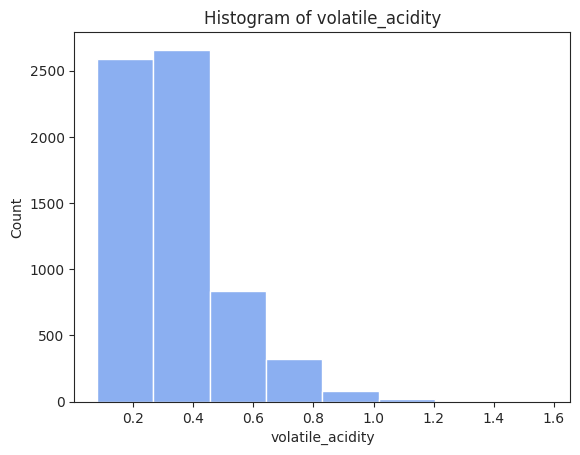

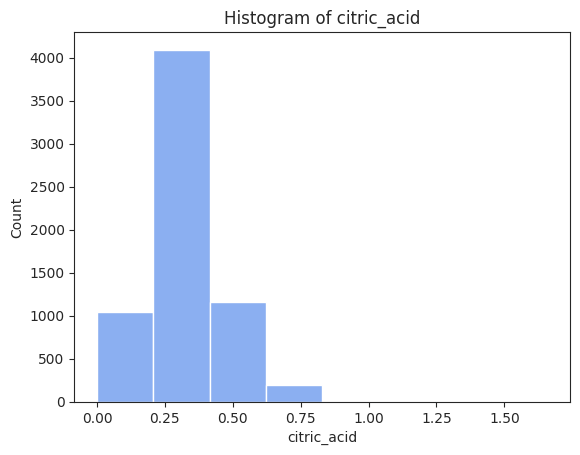

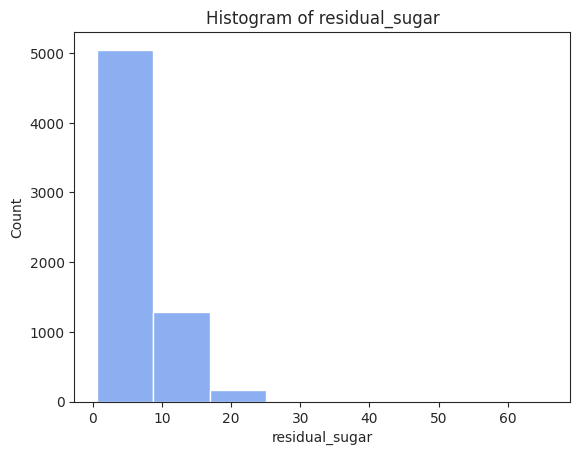

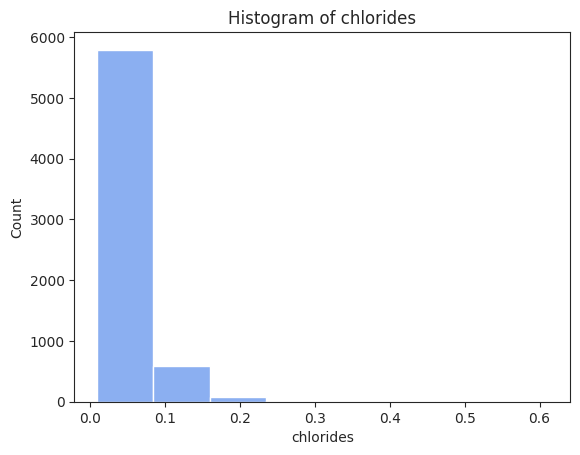

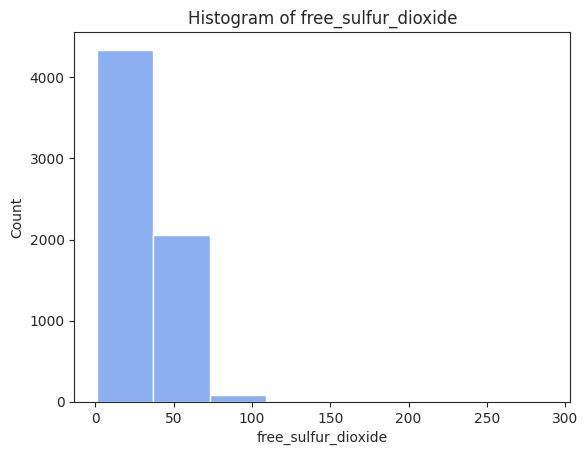

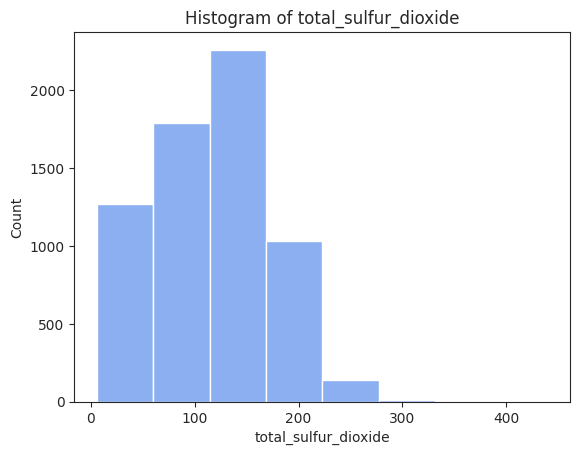

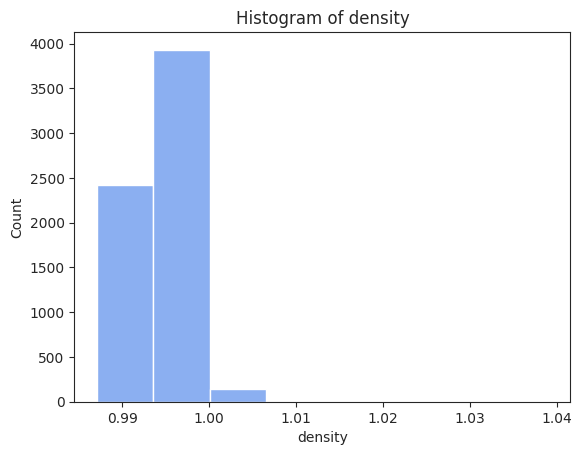

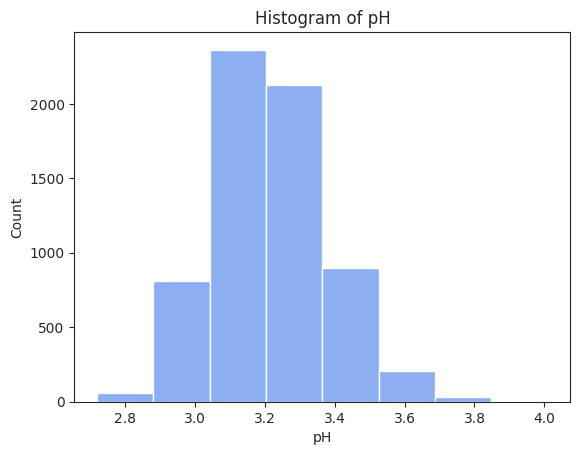

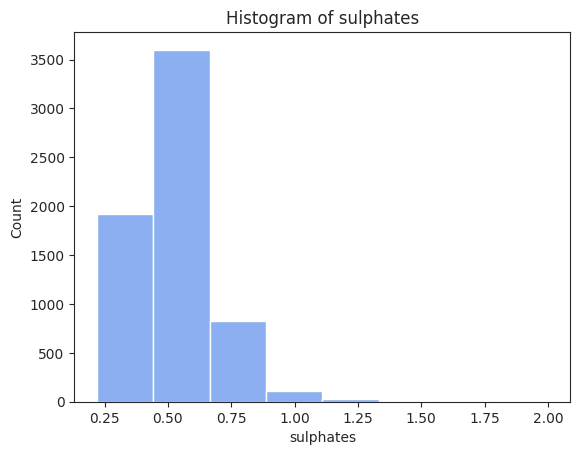

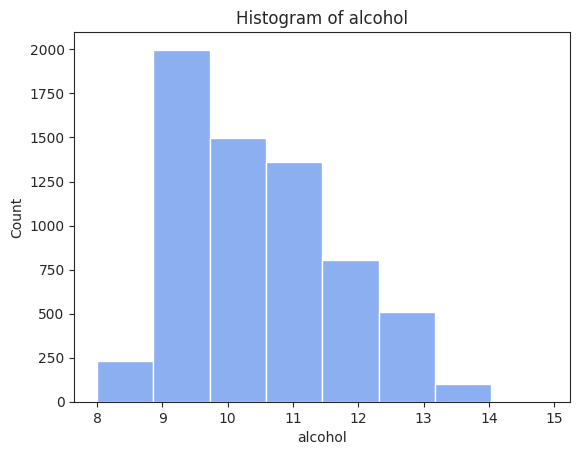

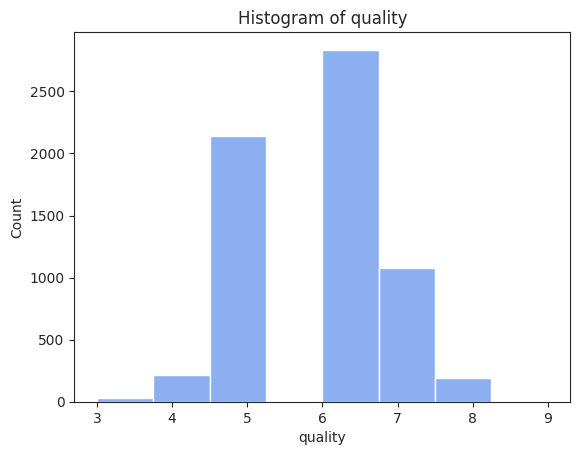

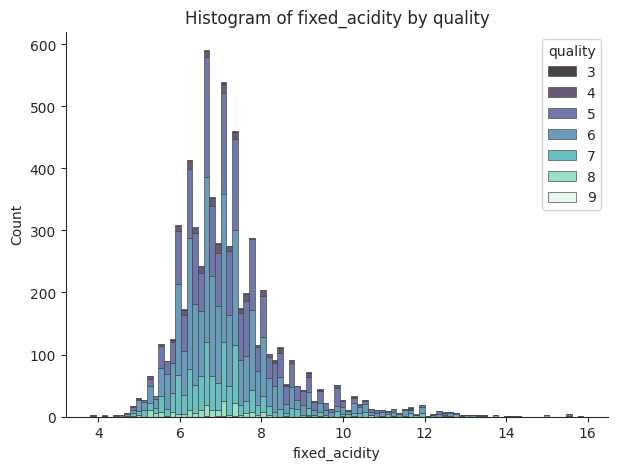

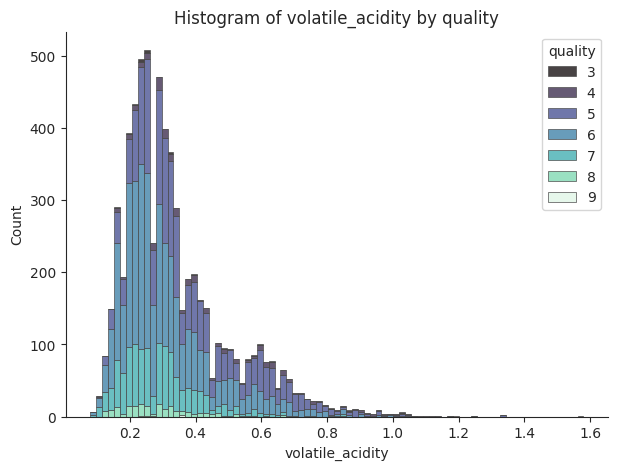

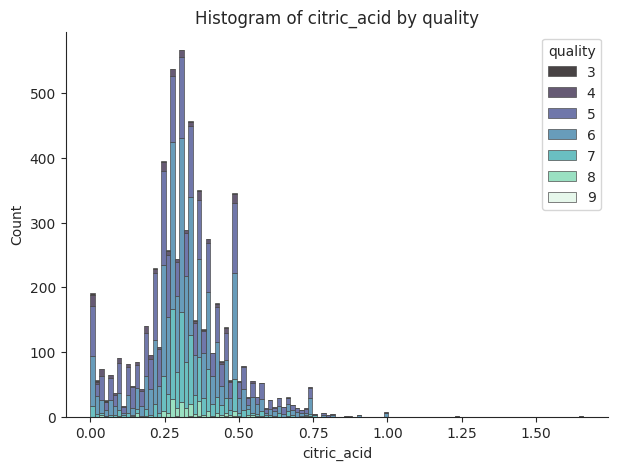

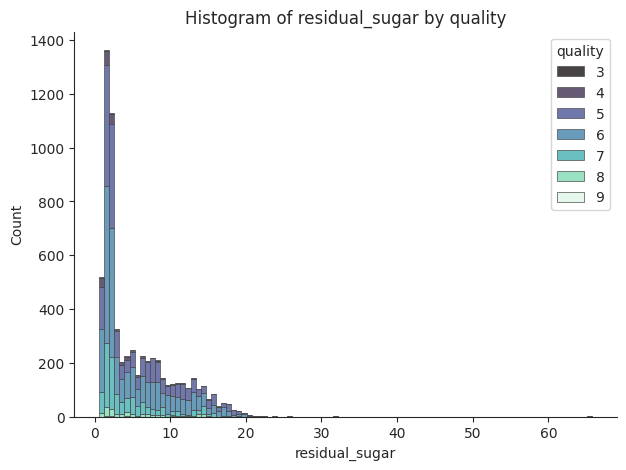

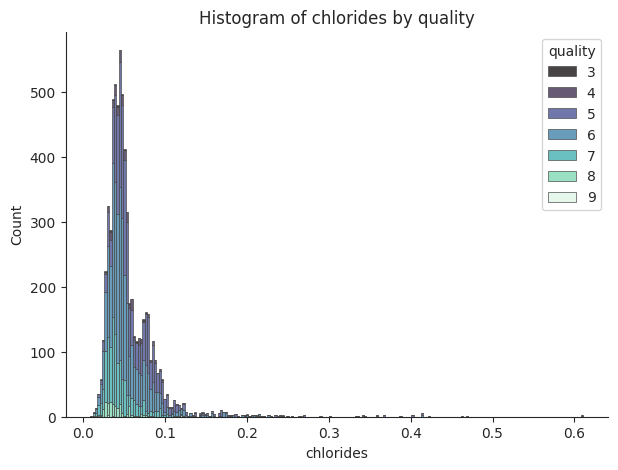

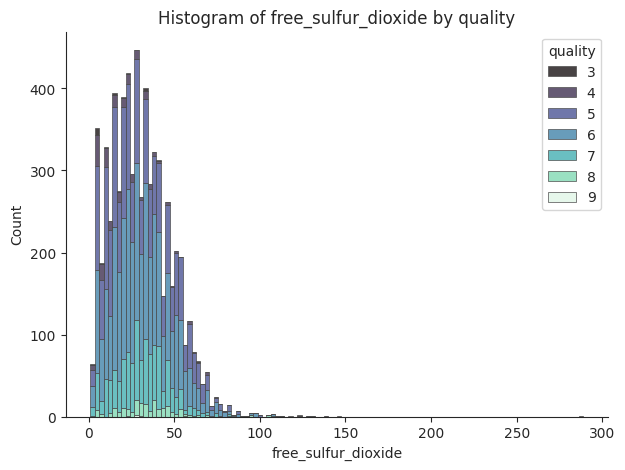

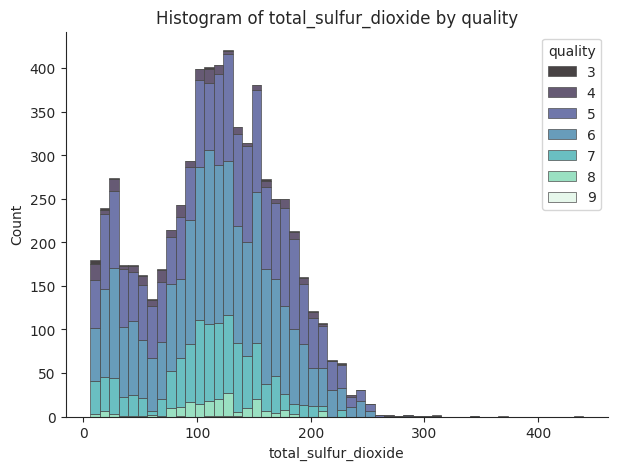

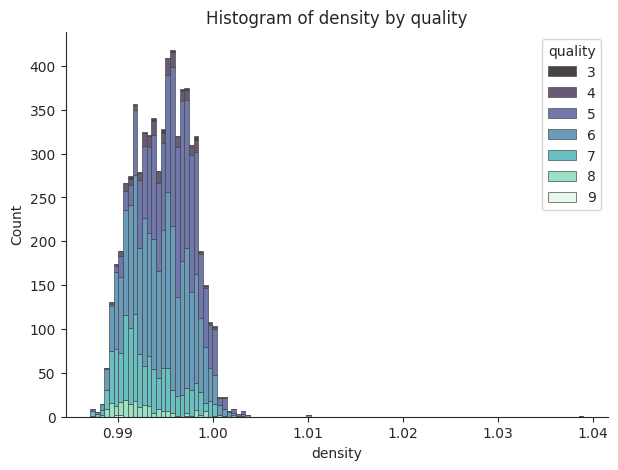

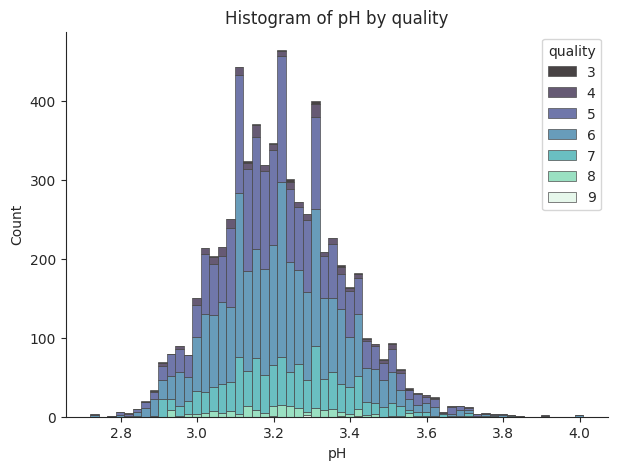

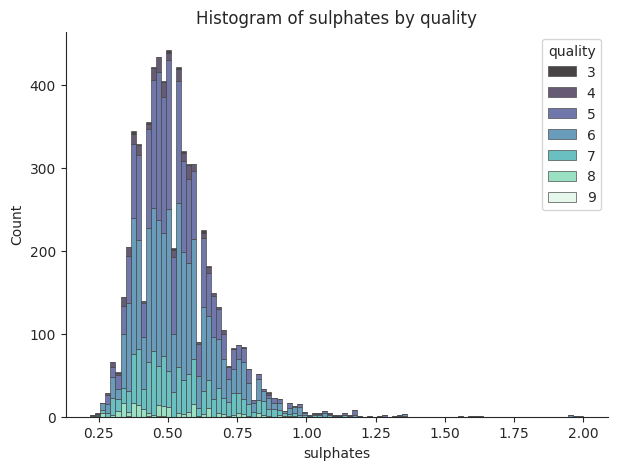

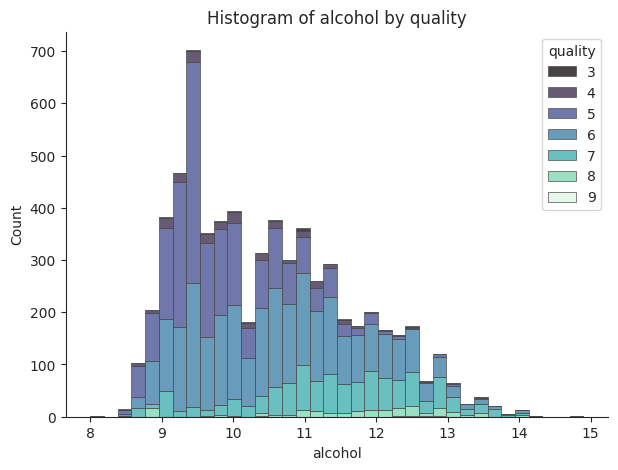

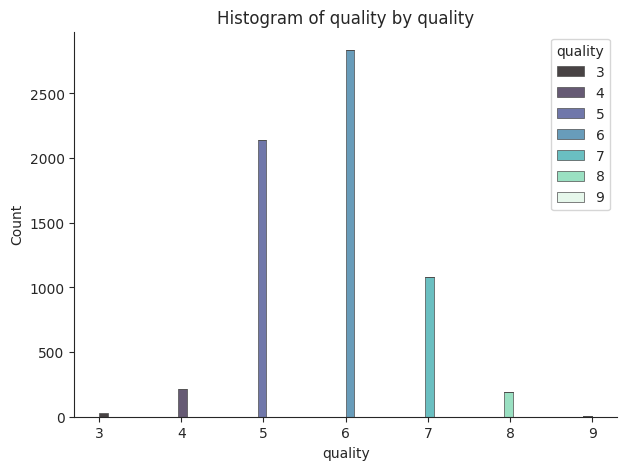

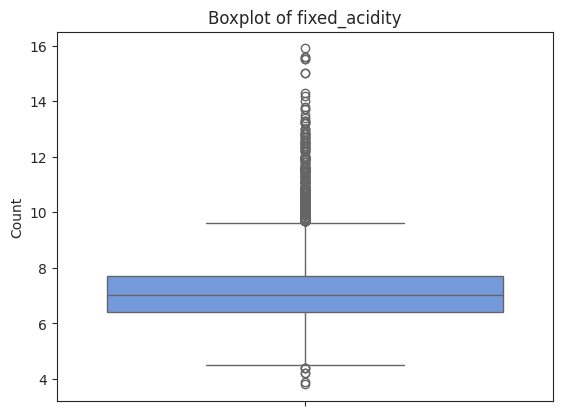

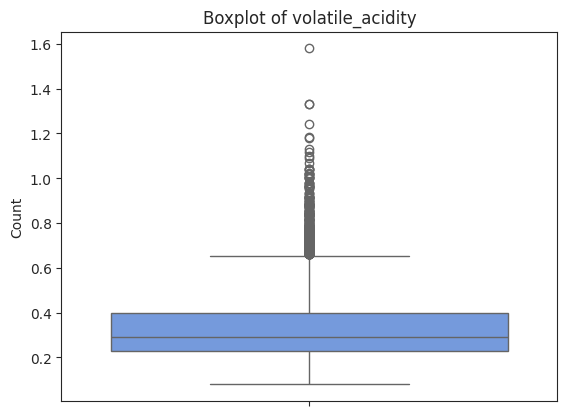

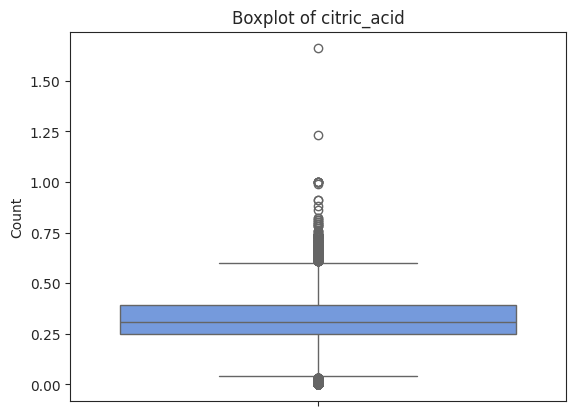

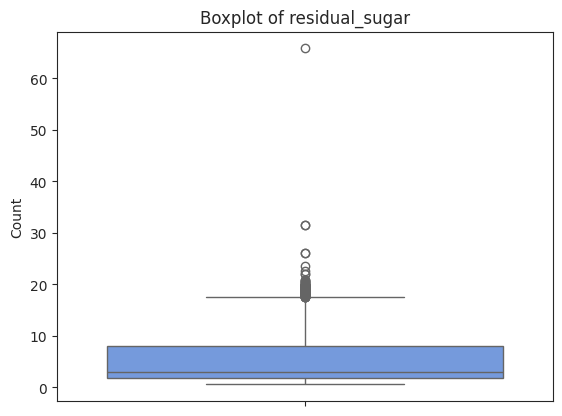

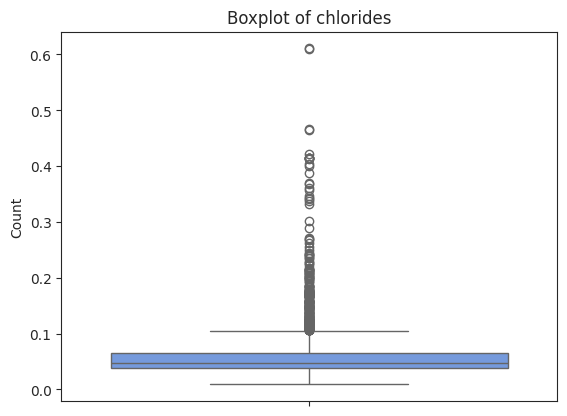

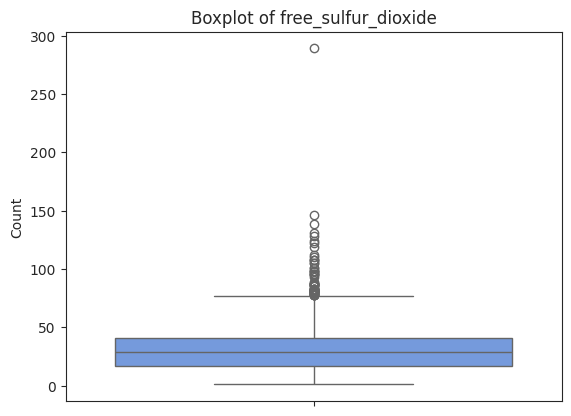

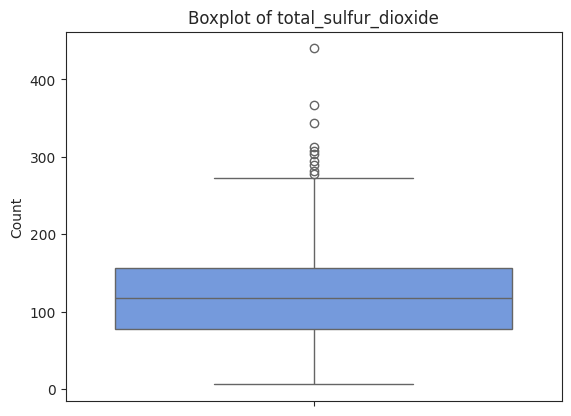

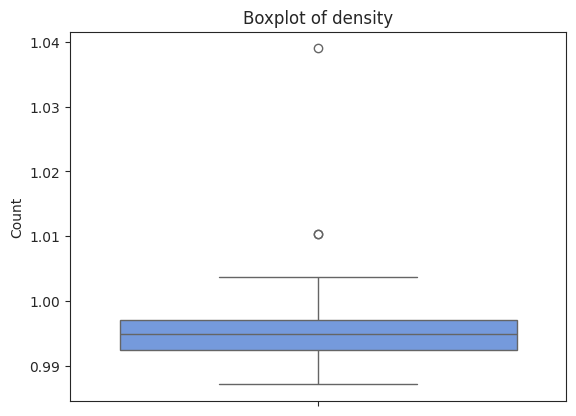

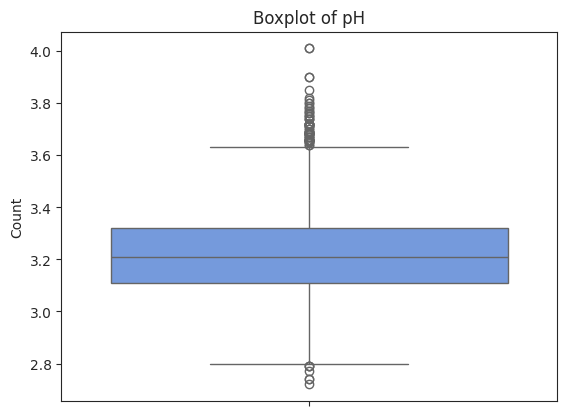

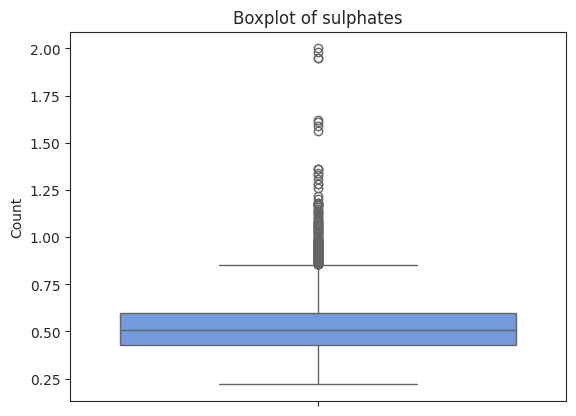

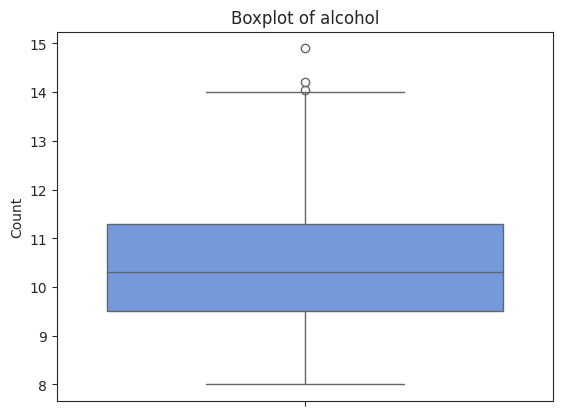

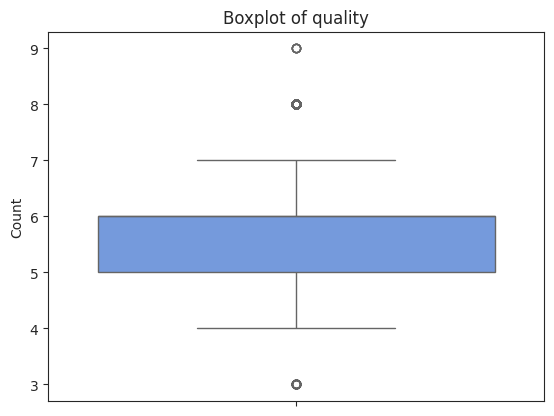

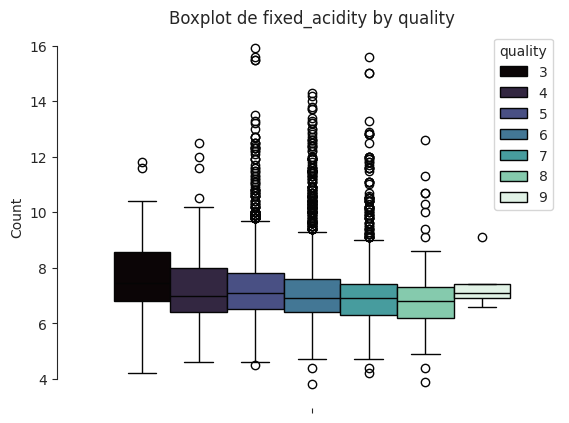

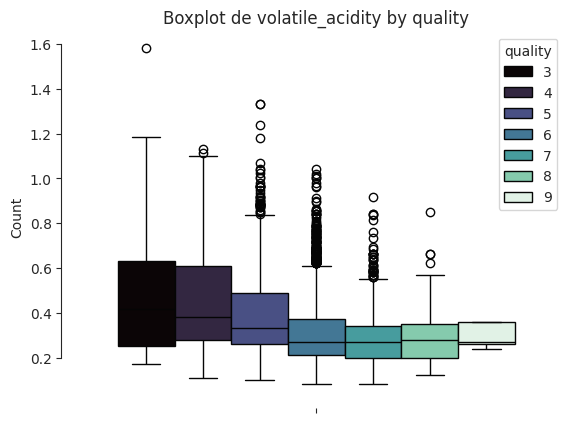

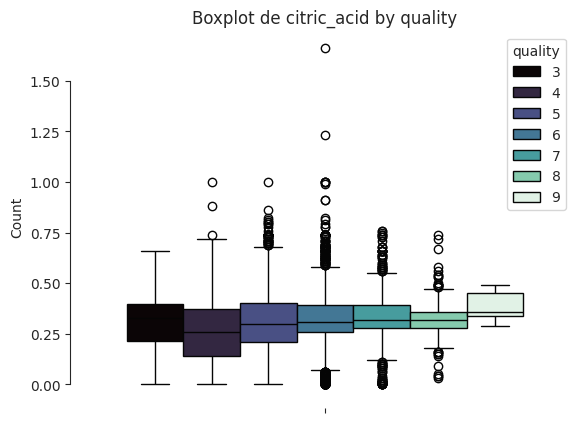

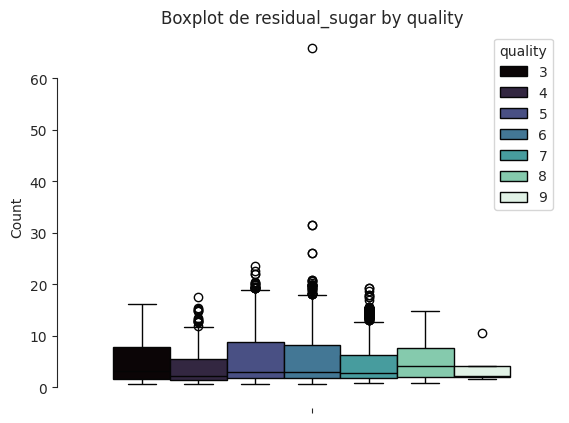

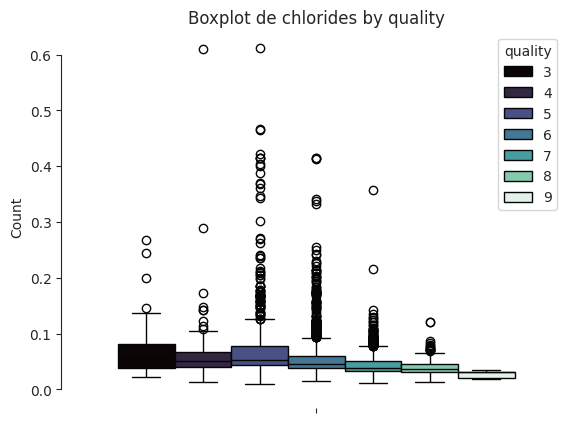

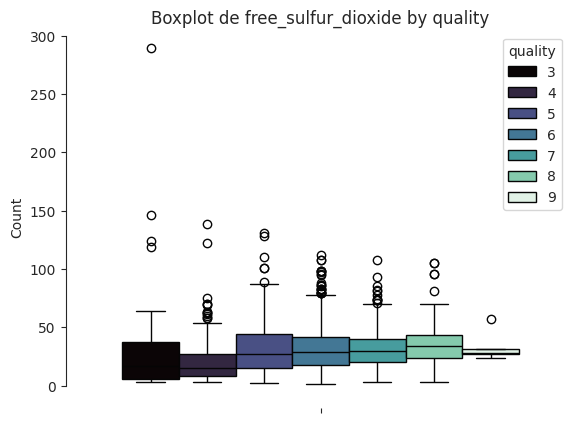

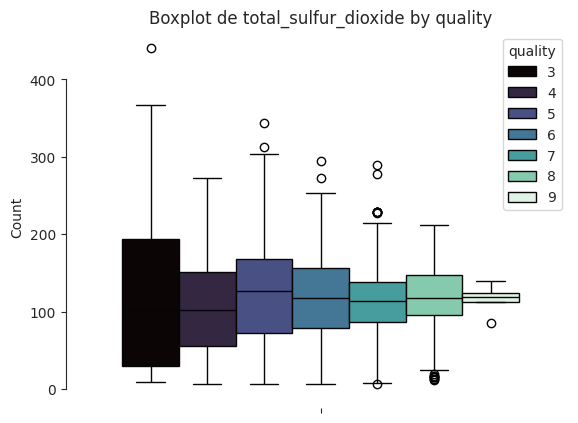

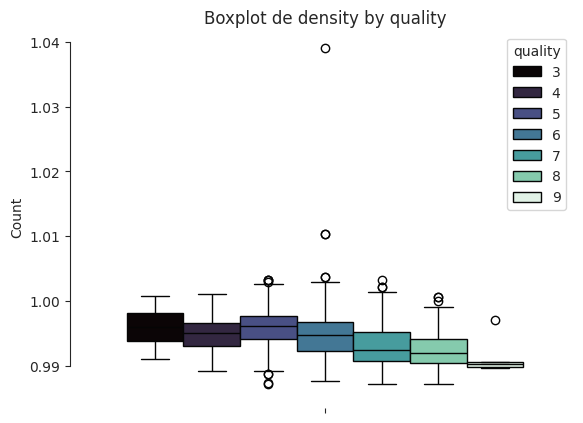

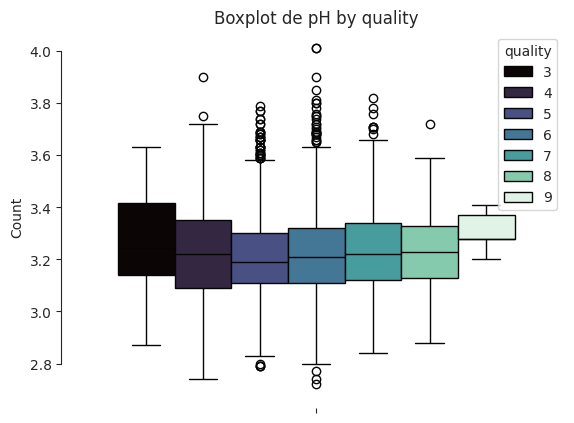

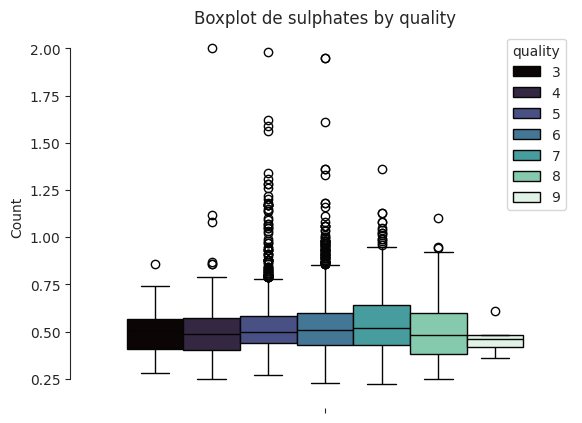

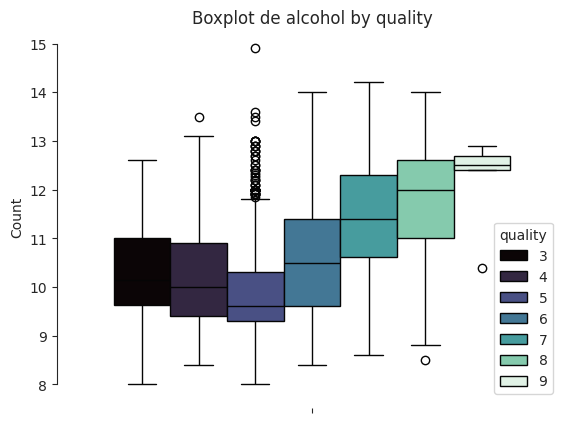

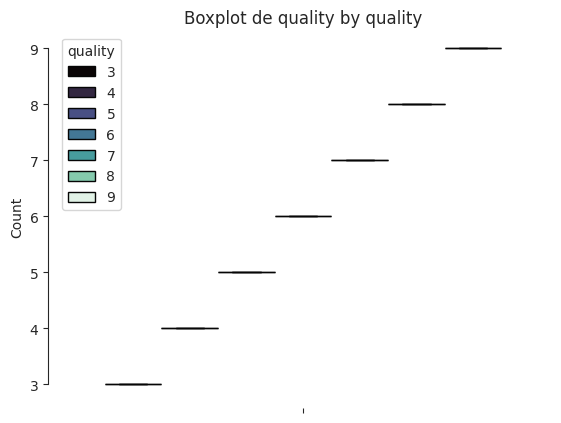

In [ ]:
univariate_analysis(wq_df_ea, 'quality')

### Análise bivariada

In [ ]:
bivariate_analysis(wq_df_ea, 'quality')

Não existe uma relação linear tão forte na maioria das variáveis

### Matriz de Correlação

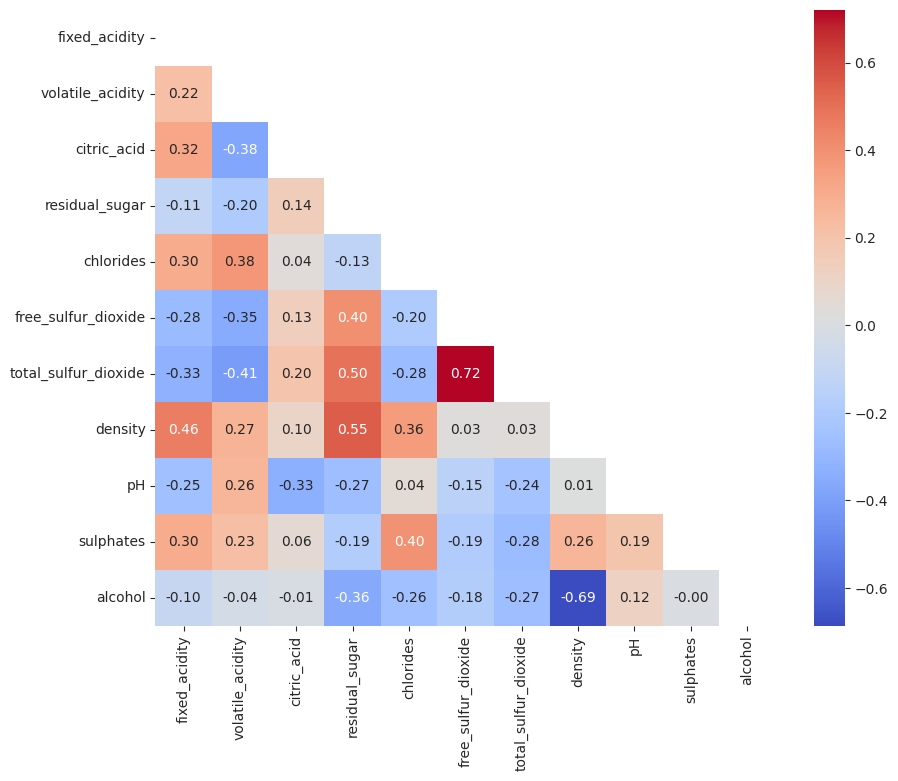

In [ ]:
corr_plot(wq_df_x)

## Pré-Processamento e Regressão

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
             wq_df_x, wq_df_y, test_size = 0.2, random_state=42)

lin_reg_pipeline.fit(X_train, y_train)
lin_reg_pred = lin_reg_pipeline.predict(X_test)
print("Linear Regression: ")
reg_report(y_test, lin_reg_pred)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
rfr_pipeline.fit(X_train, y_train)
rfr_pred = rfr_pipeline.predict(X_test)
print("Random Forest: ")
reg_report(y_test, rfr_pred)

Linear Regression: 
RMSE: 0.739
r2: 0.260
Random Forest: 
RMSE: 0.693
r2: 0.349


## Insights

Por a saída estar distribuída em valores inteiros e a predição da regressão linear estar em valores contínuos, a performance do modelo será um pouco pior, embora ainda baixa. Pela distribuição dos dados, o R^2 também não será tão alto.

# Digits Dataset

## Carregando o dataset

In [ ]:
df_2 = sklearn.datasets.load_digits()

dig_df = pd.DataFrame(data=np.c_[df_2['data'], df_2['target']],
                  columns= df_2['feature_names'] + ['target']).astype({'target': int})

## Análise Exploratória

In [ ]:
dig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [ ]:
sum(dig_df.isna().sum())

0

In [ ]:
dig_df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [ ]:
dig_df['target'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

As classes estão quase balanceadas

### Análise Univariada

In [ ]:
dig_ea = dig_df.copy()

In [ ]:
univariate_analysis(dig_ea, 'target')

Pelo tamanho do conjunto de dados, uma análise bivariada será muito custosa computacionalmente e não trará insights muito relevantes.

### Matriz de Correlação

Pelo tamanho do dataset, a matriz foi plotada de maneira diferente dos outros 2 conjuntos de dados para uma melhor visualização.

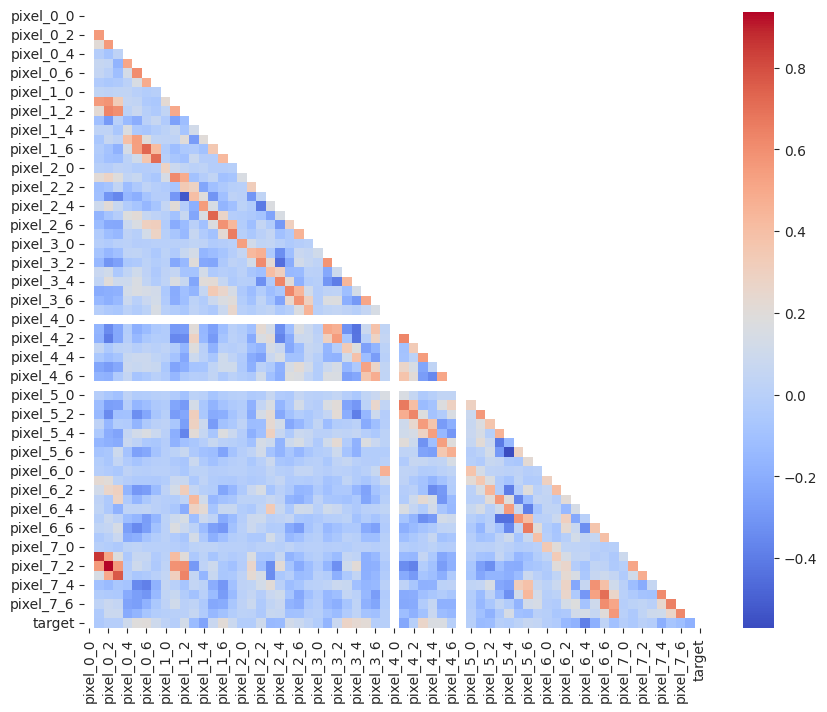

In [ ]:
corr = dig_ea.corr()
matrix = np.triu(corr)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', mask=matrix)
plt.show()

## Pré-Processamento e Classificação

In [ ]:
X = dig_df.drop(['target'], axis=1)
y = dig_df['target']

X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)

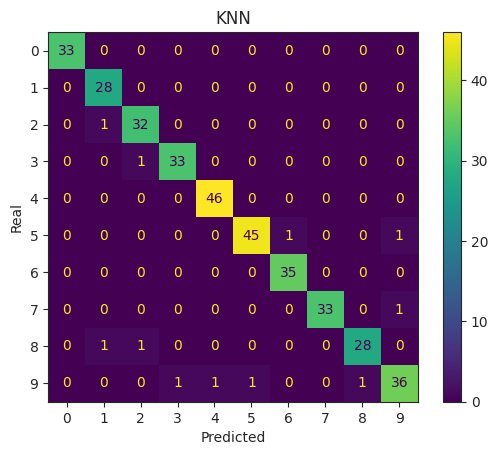

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       0.94      0.97      0.96        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       0.97      0.93      0.95        30
           9       0.95      0.90      0.92        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


Accuracy: 0.9694444444444444


In [ ]:
knn_pipeline.fit(X_train, y_train)
knn_pred = knn_pipeline.predict(X_test)

sns.set_style('ticks')
cm = confusion_matrix(y_test, knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('KNN')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()
class_report(y_test, knn_pred)

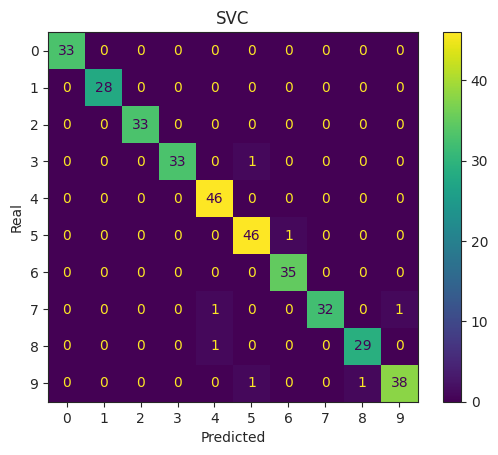

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.96      1.00      0.98        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360


Accuracy: 0.9805555555555555


In [ ]:
svc_pipeline.fit(X_train, y_train)
svc_pred = svc_pipeline.predict(X_test)

cm = confusion_matrix(y_test, svc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('SVC')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()
class_report(y_test, svc_pred)

## Insights

Por os dados das classes estarem bem balanceados e as features não possuírem uma correlação linear tão forte entre si, os modelos não-lineares conseguiram realizar boas predições e chegar a um bom nível de acurácia.